In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.pyplot import figure
import matplotlib
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

2023-04-18 09:46:09.562776: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 09:46:09.600527: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 09:46:09.601078: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 09:46:10.268843: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
%cd ../../PGGCN/weights_info

/home/ali/GBNN/PGGCN/weights_info


In [3]:
PGCN_K0 = pickle.load(open('PGCN_PG_K0_W.pkl', 'rb'))

2023-04-18 09:46:12.992502: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [13]:
pgcn_w_s = PGCN_K0[0].numpy().mean(1)

In [6]:
PGNN_K0 = pickle.load(open('PGNN_PG_K0.pkl', 'rb'))

In [7]:
pgnn_w_s = PGNN_K0[0].numpy().mean(1)

In [14]:
#                    Carbon        Nitrogen      Oxygen        Sulfur        Fluorine     degree 0      degree 1       degree 2
pgnn_w_s_selected = [pgnn_w_s[0],  pgnn_w_s[1],  pgnn_w_s[2],  pgnn_w_s[3],  pgnn_w_s[4], pgnn_w_s[45], pgnn_w_s[45],  pgnn_w_s[46]]
#                    implicit valence 0   implicit valence 1  implicit valence 2  # electrons    charge
pgnn_w_s_selected += [pgnn_w_s[56],       pgnn_w_s[57],       pgnn_w_s[58],       pgnn_w_s[62],  pgnn_w_s[63]]
pgcn_w_s_selected = [pgcn_w_s[0],  pgcn_w_s[1],  pgcn_w_s[2],  pgcn_w_s[3],  pgcn_w_s[4], pgcn_w_s[6],  pgcn_w_s[7],   pgcn_w_s[8]]
pgcn_w_s_selected += [pgcn_w_s[10], pgcn_w_s[11], pgcn_w_s[12], pgcn_w_s[18], pgcn_w_s[19]]

In [9]:
features = ['Carbon', 'Nitrogen', 'Oxygen', 'Sulfur', 'Fluorine', 'Degree 0', 'Degree 1', 'Degree 2',
    'implicit valence 0', 'implicit valence 1', 'implicit valence 2', '# electrons', 'charge']

[]

<Figure size 960x320 with 0 Axes>

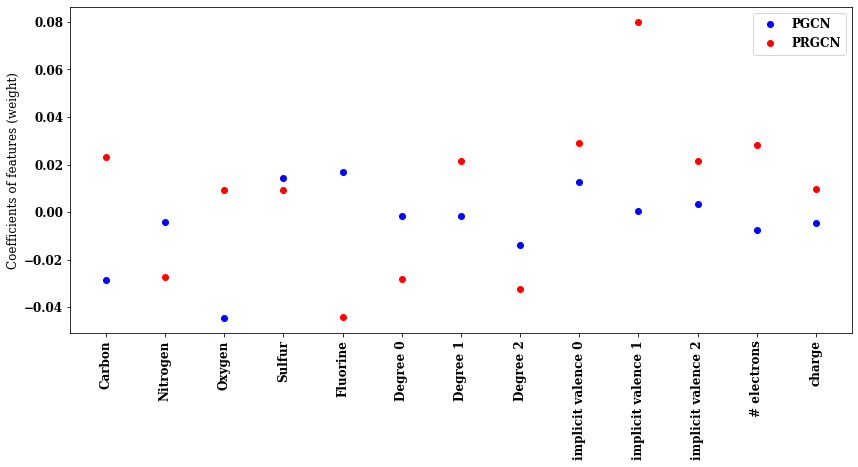

In [71]:
figure(figsize=(12, 4), dpi=80)
fig, ax = plt.subplots(1,1) 
fig.set_figheight(6)
fig.set_figwidth(14)
ax.plot(pgnn_w_s_selected, 'bo', label='PGCN')
ax.plot(pgcn_w_s_selected, 'ro', label='PRGCN')
plt.ylabel('Coefficients of features (weight)')
ax.set_xticks([*range(13)],['Carbon', 'Nitrogen', 'Oxygen', 'Sulfur', 'Fluorine', 'Degree 0', 'Degree 1', 'Degree 2',
    'implicit valence 0', 'implicit valence 1', 'implicit valence 2', '# electrons', 'charge'], rotation='vertical')
plt.legend()
plt.plot()

/tmp/ipykernel_9198/936041720.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


<Figure size 960x640 with 0 Axes>

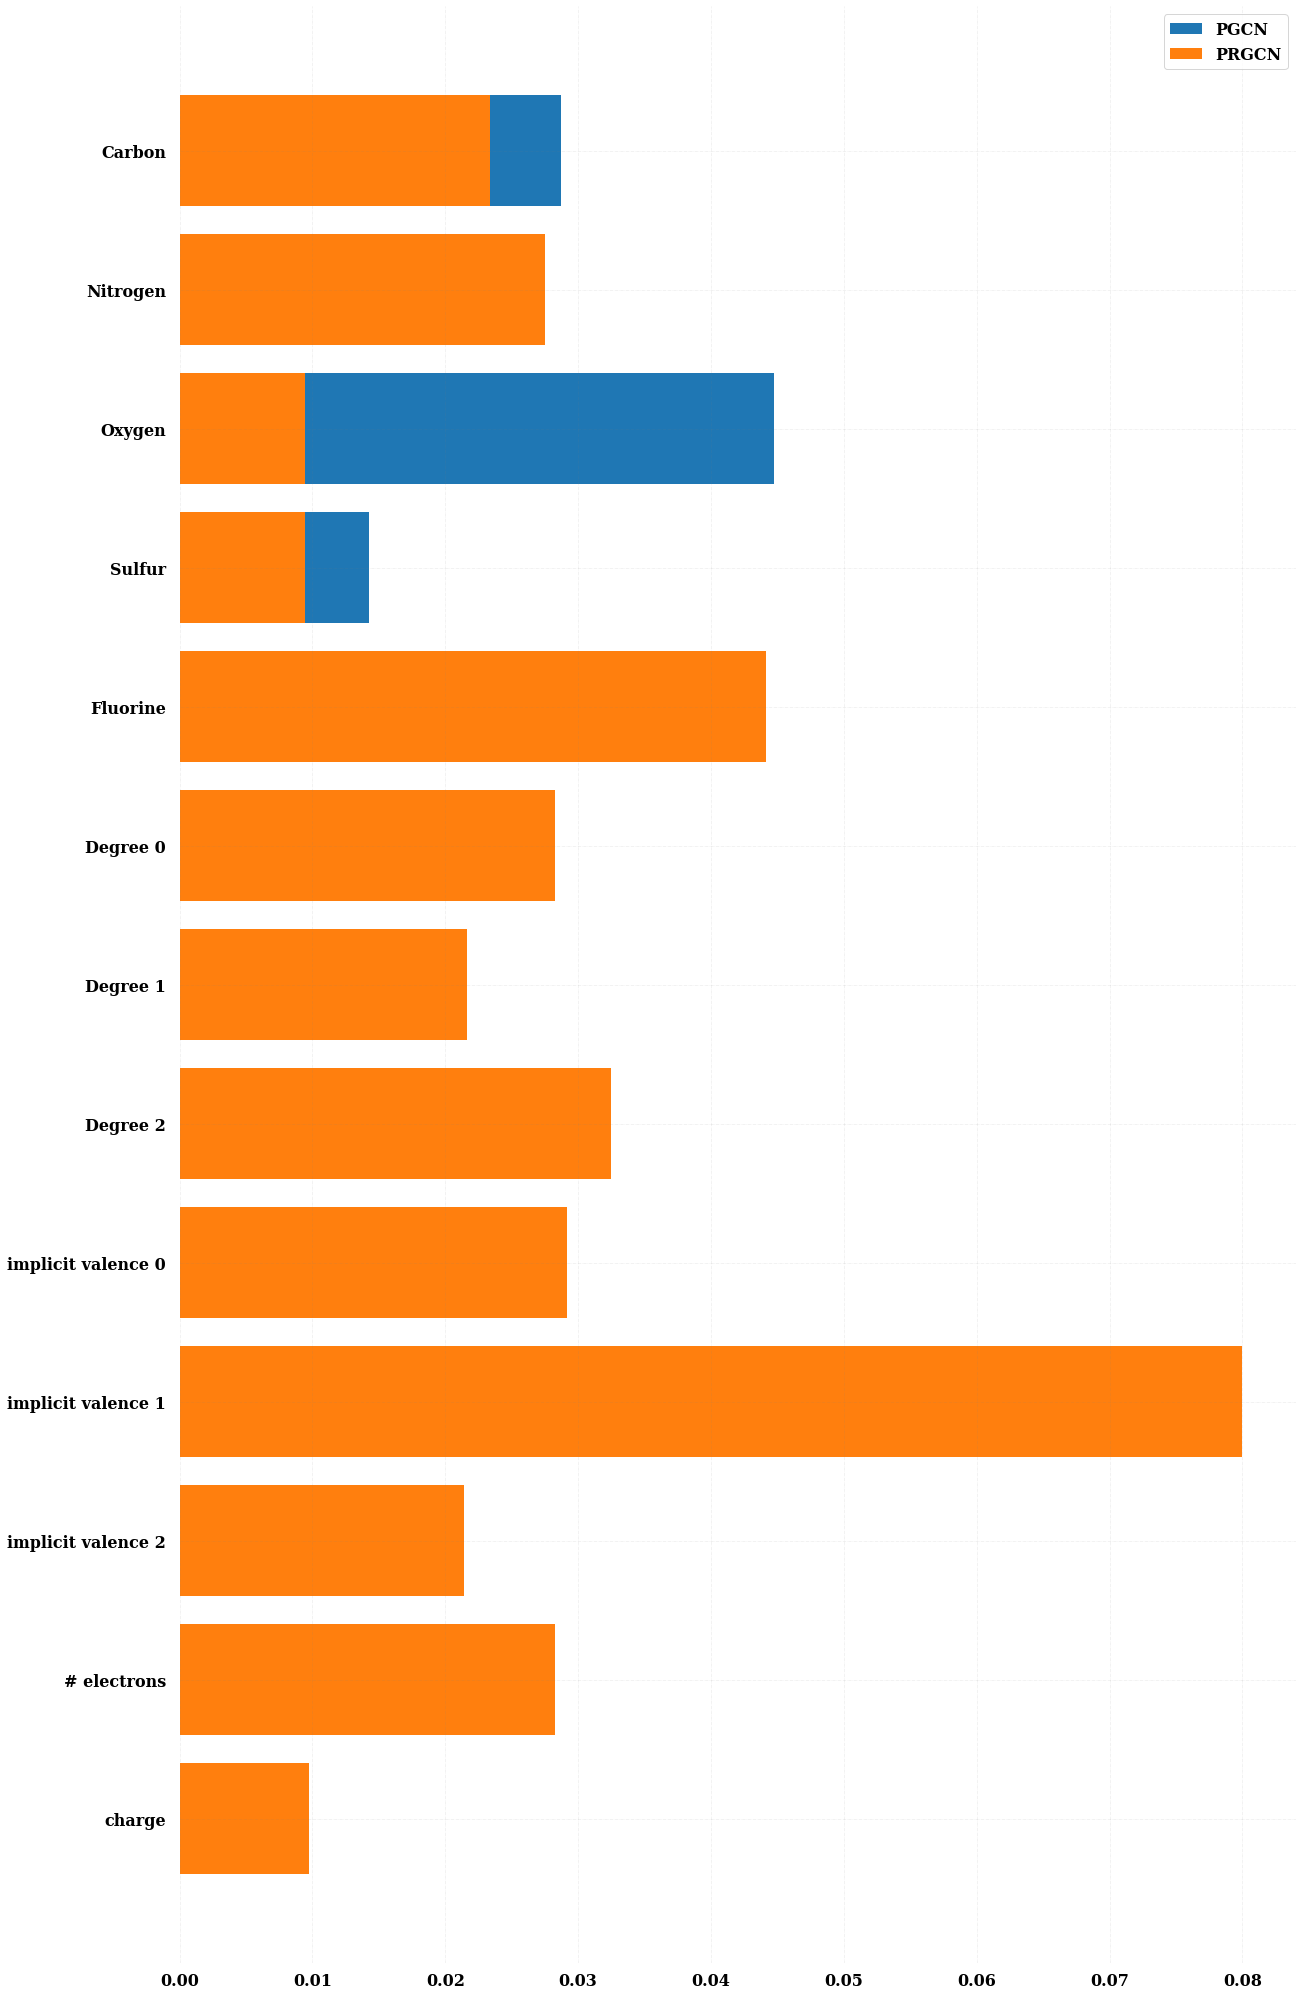

In [21]:
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

figure(figsize=(12, 8), dpi=80)
fig, ax = plt.subplots(figsize =(20, 36))
# Horizontal Bar Plot
ax.barh(features, np.abs(pgnn_w_s_selected), label='PGCN')
ax.barh(features, np.abs(pgcn_w_s_selected), label='PRGCN')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)


ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()
plt.legend()
plt.show()